In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#Loading the boston housing data
boston = load_boston()
X = boston.data
Y = boston.target 
print(X.shape)

(506, 13)


In [4]:
#standardization of the data
standardscalar = StandardScaler().fit(X)
X = standardscalar.transform(X)
print(type(X))

<class 'numpy.ndarray'>


In [5]:
test_size = 10
row_list = list(np.random.choice(X.shape[0], int(test_size), replace=False))
X_test = X[row_list]
Y_test = Y[row_list]

In [6]:
#Function to predict yhat for X data given weight and bias
def my_predict(X, W, bias):
    y_pred = []
    w = np.transpose(W)
    for index in range(len(X)):
        xi = X[index].reshape(1, X.shape[1])
        yhat = np.dot(xi, w) + bias
        y_pred.append(yhat)
    return np.array(y_pred)

In [7]:
error_list = []
train_error_list = []
test_error_list = []
def stochastic_gradient_descent(x, y, iter=100):
    mu = 0
    sigma = 0.1
    w = np.random.normal(mu, sigma, 13)
    b = np.random.normal(mu, sigma, 1)[0]
    r = 0.01
    sample_size = 10
    for i in range(iter):    
        row_list = list(np.random.choice(X.shape[0], int(sample_size), replace=False))
        x_sample = X[row_list]
        y_sample = Y[row_list]
        y_sample = y_sample.reshape(sample_size, 1)

        dw = np.zeros(13)
        for (xi,yi) in zip(x_sample, y_sample):
            dw = dw + -2* xi * (yi - np.matmul(xi.reshape(1,13), w)[0] - b)
        dw = dw*r

        db = 0
        for (xi,yi) in zip(x_sample, y_sample):
            db = db + -2* (yi - np.matmul(xi.reshape(1,13), w)[0] - b)


        w = w - dw
        b = b - r * db

        w = w + 0.0001*np.dot(np.transpose(w), w)   
        b = b + 0.0001*np.dot(np.transpose(w), w) 
        error = mean_squared_error(my_predict(x_sample, w, b), y_sample)
        train_error_list.append(error)
        error = mean_squared_error(my_predict(X_test, w, b), Y_test)
        test_error_list.append(error)     
    return (w,b)

In [8]:
theta = stochastic_gradient_descent(X, Y, 2500)
weight = theta[0]
bias = theta[1]

In [9]:
#Weight and bias computed after running the implemented stochastic gradient descent algorithm 
print("Weights", weight)
print("Intercept", bias)

Weights [-0.67298298  1.45465813  0.4182565   0.39792814 -1.99942038  2.09395874
  1.54611192 -3.97337011  1.95976188 -2.51080755 -1.87147134  0.56619791
 -5.04099911]
Intercept [22.68558451]


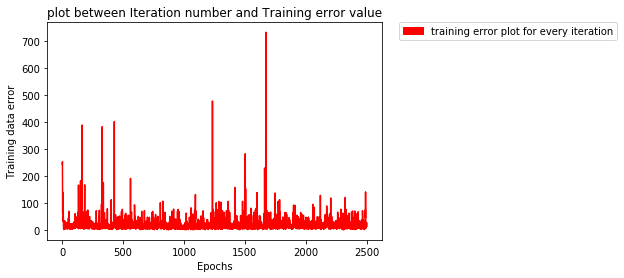

In [10]:
#Plot between iteration number and training data error
from math import log
x_axis = list(range(1, len(train_error_list)+1))
plt.plot(x_axis, train_error_list, color='red')
plt.title('plot between Iteration number and Training error value')
red_patch = mpatches.Patch(color='red', label='training error plot for every iteration')
plt.legend(handles=[red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Epochs')
plt.ylabel('Training data error')
plt.show()

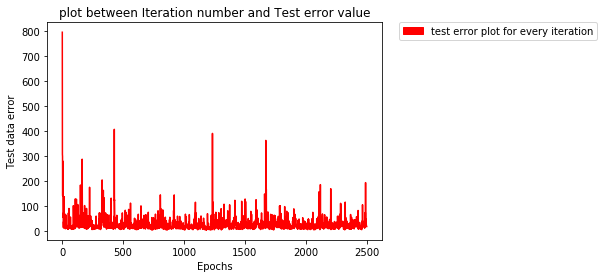

In [11]:
#Plot between iteration number and test data error
x_axis = list(range(1, len(test_error_list)+1))
plt.plot(x_axis, test_error_list, color='red')
plt.title('plot between Iteration number and Test error value')
red_patch = mpatches.Patch(color='red', label='test error plot for every iteration')
plt.legend(handles=[red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Epochs')
plt.ylabel('Test data error')
plt.show()

In [12]:
#Running sklearn's SGDRegressor's algorithm for the same data 
sklearnsgd = SGDRegressor(max_iter=1000, loss='squared_loss', penalty="l2")
sklearnsgd.fit(X, Y)
print("Weights", sklearnsgd.coef_)
print("Intercept", sklearnsgd.intercept_)

Weights [-0.94131774  1.09502367  0.1235104   0.68289276 -2.0727037   2.68302448
  0.00668969 -3.08804735  2.64318179 -2.09082783 -2.07391736  0.8590397
 -3.75865891]
Intercept [22.53507466]


In [ ]:
#plot between Y_test and Y_pred of the test

In [13]:
test_size = 10
y_pred_implementedsgd = []
y_pred_sklearnsgd = []
row_list = list(np.random.choice(X.shape[0], int(test_size), replace=False))
print(row_list)
X_test = X[row_list]
Y_test = Y[row_list]
for (xi,yi) in zip(X_test, Y_test):
    #print("Actual target value:", yi)
    xi = xi.reshape(1, 13)
    y_pred = sklearnsgd.predict(xi)
    y_pred_sklearnsgd.append(y_pred)
    yi = yi.reshape(1,)
    y_pred = my_predict(xi, weight, bias)
    y_pred_implementedsgd.append(y_pred)
y_pred_sklearnsgd = np.array(y_pred_sklearnsgd).reshape(test_size,).tolist()
y_pred_implementedsgd = np.array(y_pred_implementedsgd).reshape(test_size,).tolist()
print("Mean squared error of sklearn SGDRegressor:", mean_squared_error(y_pred_sklearnsgd, Y_test))
print("Mean squared error of implemented regressor",  mean_squared_error(y_pred_implementedsgd, Y_test))

[168, 179, 211, 31, 485, 48, 416, 428, 56, 45]
Mean squared error of sklearn SGDRegressor: 12.067512808059206
Mean squared error of implemented regressor 17.009081016635527


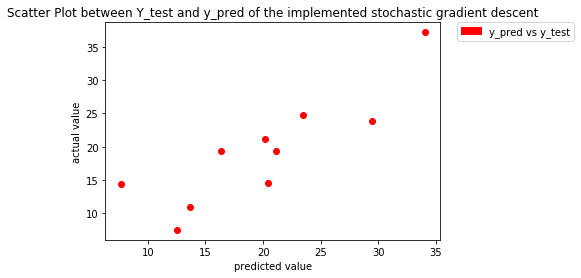

In [14]:
#Scatter Plot between Y_test and y_pred of the implemented stochastic gradient descent
plt.scatter(y_pred_implementedsgd, Y_test, color='red')
plt.title('Scatter Plot between Y_test and y_pred of the implemented stochastic gradient descent')
red_patch = mpatches.Patch(color='red', label='y_pred vs y_test')
plt.legend(handles=[red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

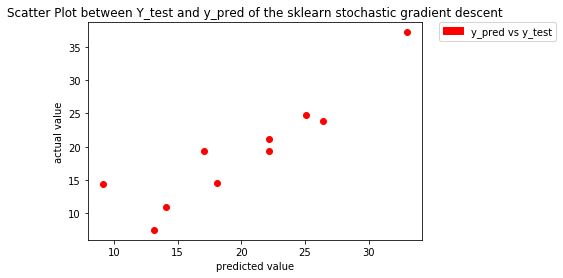

In [15]:
#Scatter Plot between Y_test and y_pred of the sklearn's gradient descent
plt.scatter(y_pred_sklearnsgd, Y_test, color='red')
plt.title('Scatter Plot between Y_test and y_pred of the sklearn stochastic gradient descent')
red_patch = mpatches.Patch(color='red', label='y_pred vs y_test')
plt.legend(handles=[red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()